In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200


## Temperatura

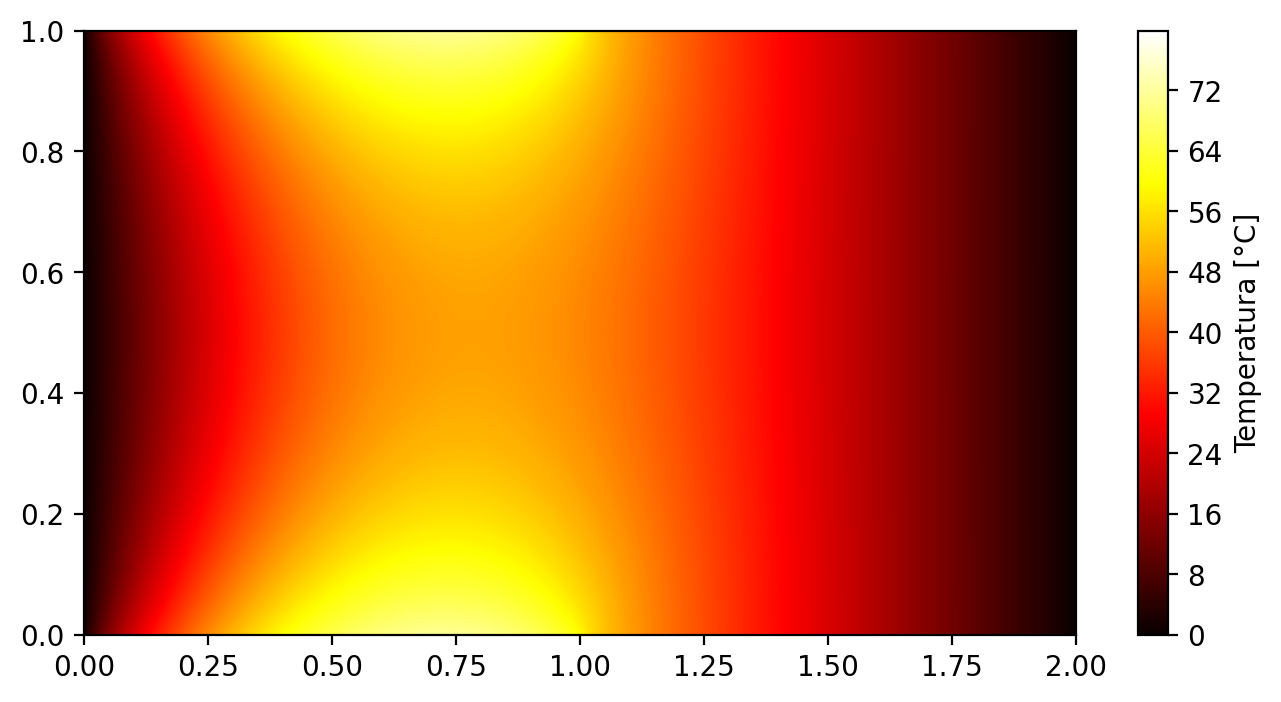

In [13]:
T = pd.read_csv("results/Results_T_eu.txt", header=None, delim_whitespace=True)
Lx = 2
Ly = 1
Ny,Nx = T.shape

x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

X,Y = np.meshgrid(x,y)

fig0, ax0 = plt.subplots(1, 1, )
cf0 = ax0.contourf(X,Y,T,np.arange(0, 80, .1), cmap="hot")
cbar0 = plt.colorbar(cf0,)

cbar0.set_label('Temperatura [°C]')
fig = plt.gcf()
fig.set_size_inches(8, 4)

name = 'none'
path_dir = os.path.join(os.getcwd(),'plots',name+'.png')
fig.savefig(path_dir)

## Flujo Calor

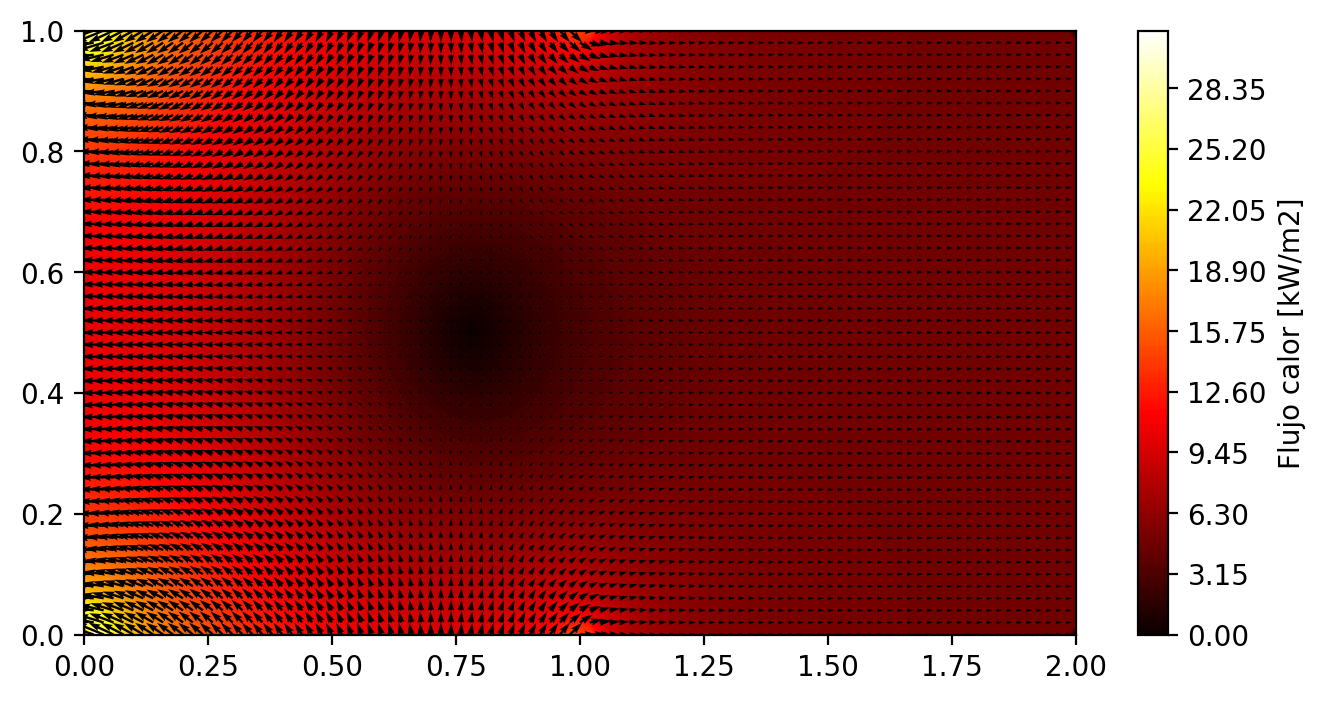

<Figure size 1200x800 with 0 Axes>

In [18]:
q = pd.read_csv("results/Results_q_eu.txt", header=None, delim_whitespace=True)
qx = pd.read_csv("results/Results_qx_eu.txt", header=None, delim_whitespace=True)
qy = pd.read_csv("results/Results_qy_eu.txt", header=None, delim_whitespace=True)

Lx = 2
Ly = 1
Ny,Nx = q.shape

x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,q/1000,300, cmap="hot")
cbar = plt.colorbar()
plt.quiver(X,Y,qx*100,qy*100,color='k')
fig = plt.gcf()
cbar.set_label('Flujo calor [kW/m2]')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()
plt.savefig('heat.png')

## Residual

In [27]:
res1 = pd.read_csv("results/Residual_eu1.txt", header=None, delim_whitespace=True)

res3 = pd.read_csv("results/Residual_eu3.txt", header=None, delim_whitespace=True)

res2 = pd.read_csv("results/Residual_cn2.txt", header=None, delim_whitespace=True)

res4 = pd.read_csv("results/Residual_cn4.txt", header=None, delim_whitespace=True)

res5 = pd.read_csv("results/Residual_eu5.txt", header=None, delim_whitespace=True)

res6 = pd.read_csv("results/Residual_cn6.txt", header=None, delim_whitespace=True)

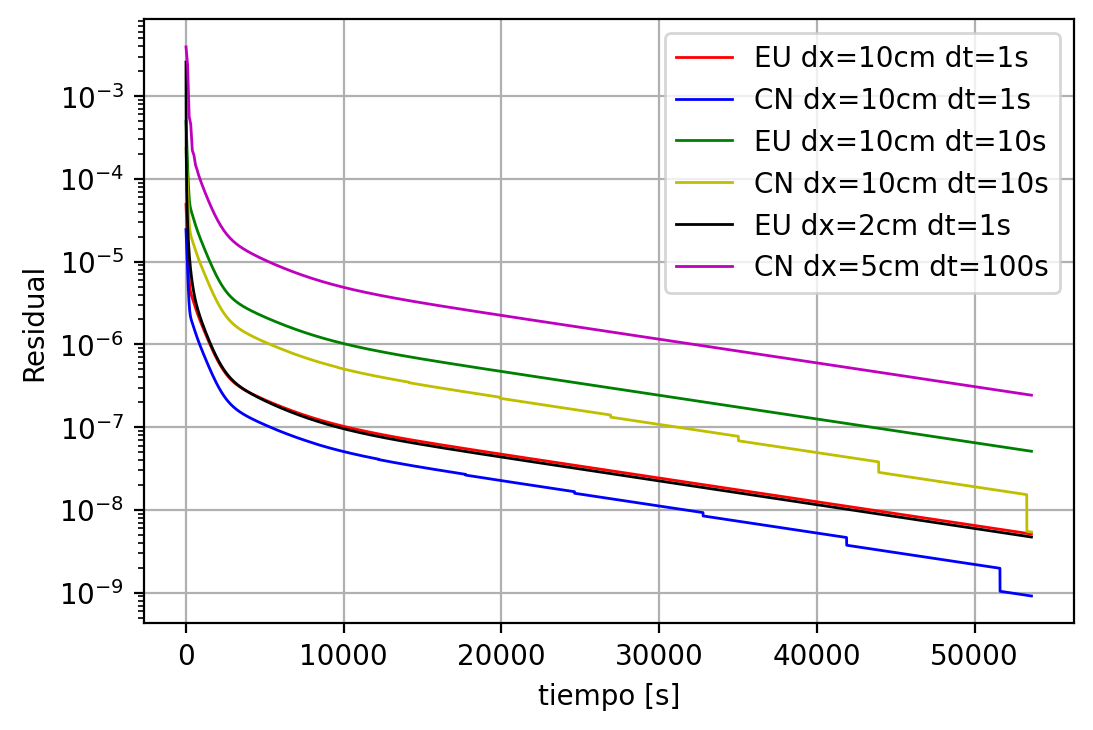

In [30]:

t = np.linspace(0,53600,53600)
plt.plot(t,res1[:53600].to_numpy(), label="EU dx=10cm dt=1s", linewidth=1,color='r', fillstyle='none')
plt.plot(t,res2[:53600].to_numpy(), label="CN dx=10cm dt=1s", linewidth=1,color='b', fillstyle='none')


a1 = 10
t2 = np.linspace(0,53600,53600//a1)
plt.plot(t2,res3[:53600//a1].to_numpy(), label="EU dx=10cm dt=10s", linewidth=1,color='g', fillstyle='none')

t2 = np.linspace(0,53600,53600//a1)
plt.plot(t2,res4[:53600//a1].to_numpy(), label="CN dx=10cm dt=10s", linewidth=1,color='y', fillstyle='none')


a1 = 1
t2 = np.linspace(0,53600,53600//a1)
plt.plot(t2,res5[:53600//a1].to_numpy(), label="EU dx=2cm dt=1s", linewidth=1,color='k', fillstyle='none')


a1 = 100
t2 = np.linspace(0,53600,53600//a1)
plt.plot(t2,res6[:53600//a1].to_numpy(), label="CN dx=5cm dt=100s", linewidth=1,color='m', fillstyle='none')

plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('tiempo [s]')
plt.ylabel('Residual')

fig = plt.gcf()

## Parte Simetrica


In [14]:
T_b = np.zeros(Nx+Nx+Ny-2)
k = -1
Tx = T.to_numpy()

T_b[:Nx] = Tx[0,:]
T_b[Ny//2+Nx+1:Ny//2+Nx+Nx] = Tx[Ny//2,-1:0:-1]



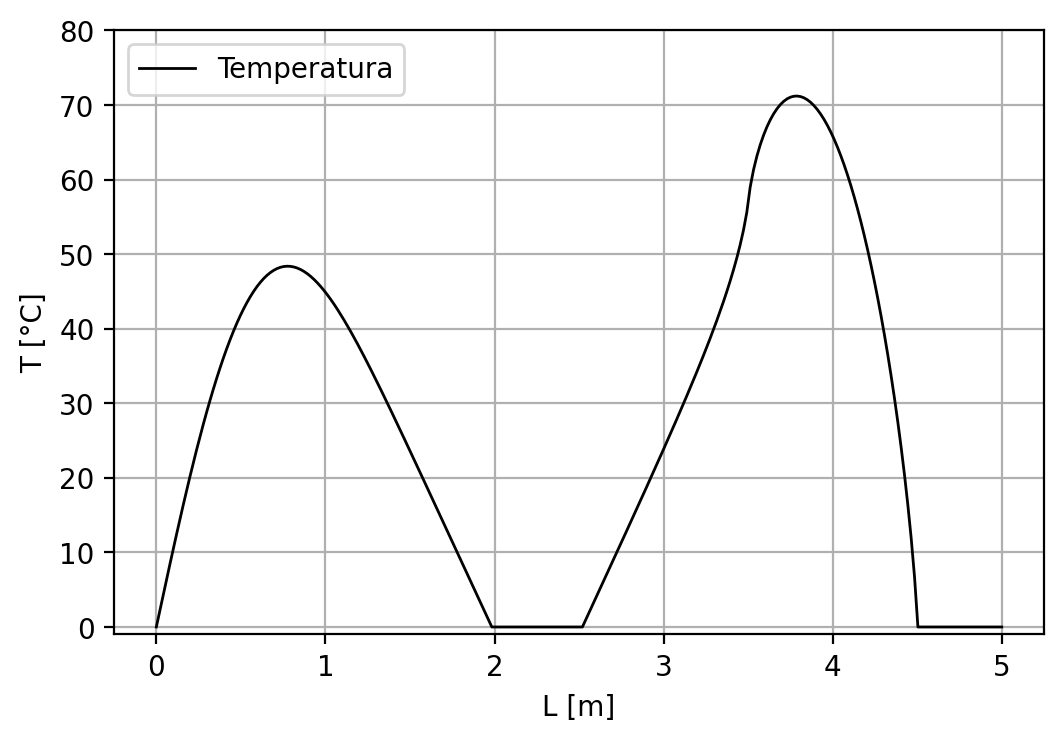

In [17]:
kk = 0
T2 = np.zeros(Nx+Nx+Ny-2+Ny//2)
for k in range(len(T_b)-1,0,-1):
    T2[kk] = T_b[k]
    kk = kk+1

ll = np.linspace(0,5,253)

plt.plot(ll,T2[Ny//2-2:],linewidth=1,color='k', label='Temperatura')
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('L [m]')
plt.ylabel('T [°C]')
plt.ylim([-1,80])
fig = plt.gcf()
fig.set_size_inches(6, 4)

## Video evolucion

In [ ]:

ext = ('.txt')
dir1,_ = os.path.split(os.getcwd())
dir_folder = os.path.join(dir1,'cn_rtxt')
for file in os.listdir(dir_folder):
    if file.endswith(ext):
        T = pd.read_csv(os.path.join(dir_folder,file), header=None, delim_whitespace=True)
        Lx = 2
        Ly = 1
        Ny,Nx = T.shape

        x = np.linspace(0,Lx,Nx)
        y = np.linspace(0,Ly,Ny)

        X,Y = np.meshgrid(x,y)

        fig0, ax0 = plt.subplots(1, 1, )
        cf0 = ax0.contourf(X,Y,T,np.arange(0, 80, .1), cmap="hot")
        cbar0 = plt.colorbar(cf0,)

        cbar0.set_label('Temperatura [°C]')

        fig = plt.gcf()
        fig.set_size_inches(8, 4)
        name = file.replace('.txt','.png')
        dir2,_ = os.path.split(dir1)
        fig.savefig(os.path.join(dir2,'Plots','plots_evolution',name));
    else:
        continue
    

In [20]:
import imageio


dir2,_ = os.path.split(dir1)
dir3 = os.path.join(dir2,'Plots','plots_evolution')
with imageio.get_writer('Temperature_evolution_code_cn.gif', mode='I') as writer:
    for filename in os.listdir(dir3): 
        image = imageio.imread(os.path.join(dir3,filename))
        writer.append_data(image)

C:\Users\achom\AppData\Local\Temp\ipykernel_11732\538687574.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(dir3,filename))
